# Mandelbrot Set

## Definition
Take a starting point $z_0$ in the complex plane. Then we use the quadratic recurrence equation
$$ 
z_{n+1}=z_n^2+z_0
$$ 	
to obtain a sequence of complex numbers $z_n$ with $n=0, 1, 2, ...$. The points $z_n$ are said to form the orbit of $z_0$, and the Mandelbrot set, denoted by $M$, is defined as follows:

If the orbit $z_n$ fails to go to infinity, we say that $z_0$ is contained within the set $M$. If the orbit $z_n$ does go to infinity, we say that the point $z_0$ is outside $M$.

## Notes
* $M$ can be bounded by $-2 \leq x \leq 2$ and $-2 \leq y \leq 2$, though $-2.5 \leq x \leq 1.5$ and $-2 \leq y \leq 2$ might yield better results.
* The absolute value of $z_n$ can be used to determine if the orbit goes to infinity. If $|z_n|>2$, then the orbit goes to infinity. If $|z_n|\leq 2$, then the orbit does not go to infinity.
* An maximum number of iterations is used to determine if the orbit goes to infinity. If the maximum number of iterations is reached, then the orbit is assumed to be bounded and the point is contained within the set $M$.

T

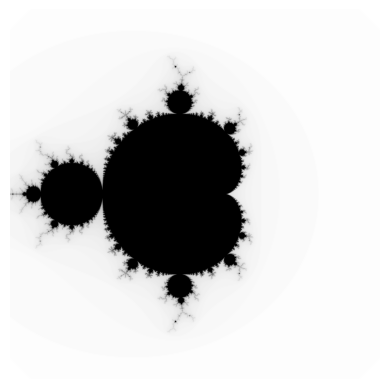

In [7]:
from ctypes.wintypes import SIZE
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

CONVERGENCE_THRESHOLD = 2
MAX_ITERATIONS = 100
X_MIN, X_MAX = -2.5, 1.5
Y_MIN, Y_MAX = -2, 2
SIZE = 2000


def pixel_to_complex(x, y):
    return complex(X_MIN + (x / x_width) * (X_MAX - X_MIN), Y_MIN + (y / y_height) * (Y_MAX - Y_MIN))

def iterations_until_divergence(c):
    z = 0
    for iteration in range(MAX_ITERATIONS):
        z = z**2 + c
        if abs(z) > CONVERGENCE_THRESHOLD:
            return iteration
    return MAX_ITERATIONS

image = Image.new('RGB', (SIZE, SIZE))
x_width, y_height = image.size

draw_image = ImageDraw.Draw(image, 'RGB')

for x in range(x_width):
    for y in range(y_height):
        iterations = iterations_until_divergence(pixel_to_complex(x, y))
        color = 255 - int(iterations / MAX_ITERATIONS * 255)
        image.putpixel((x, y), (color, color, color))

rectangle_width = 100
rectangle_height = 100



image.save(f'./output.png')

plt.imshow(image)
plt.axis('off')
plt.show()

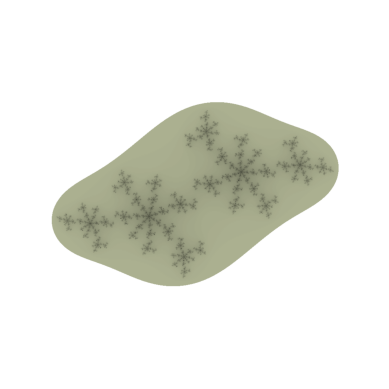

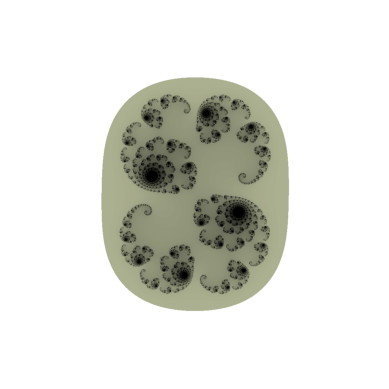

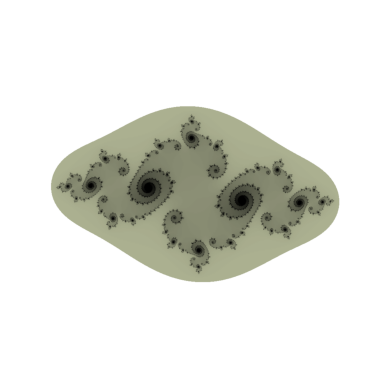

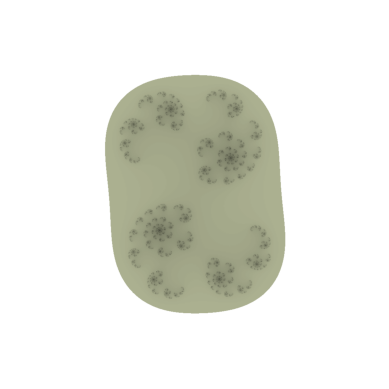

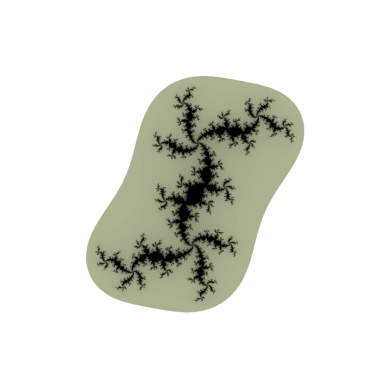

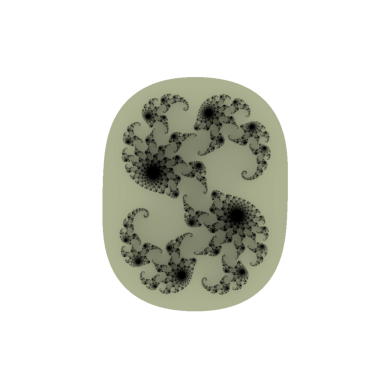

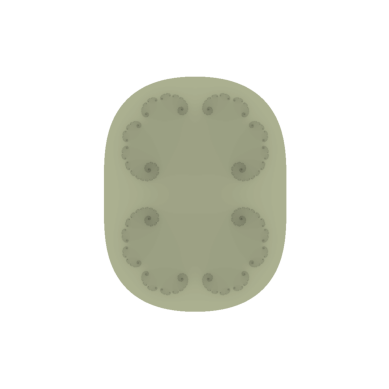

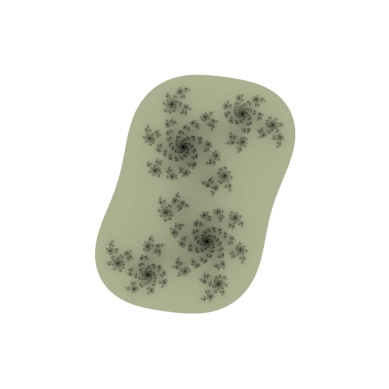

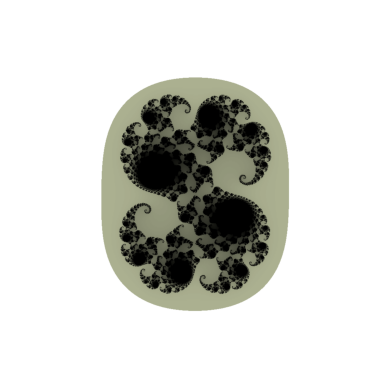

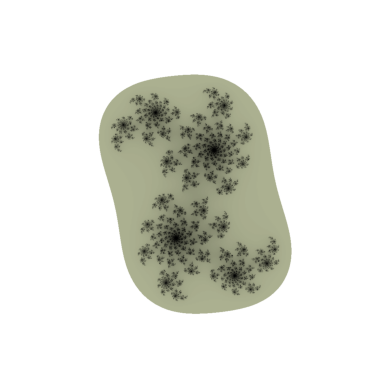

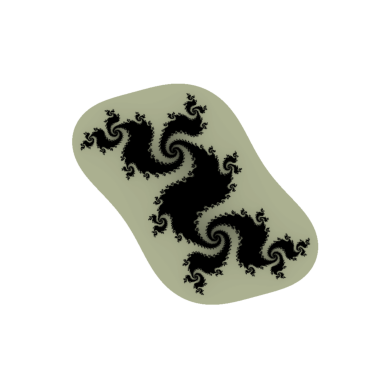

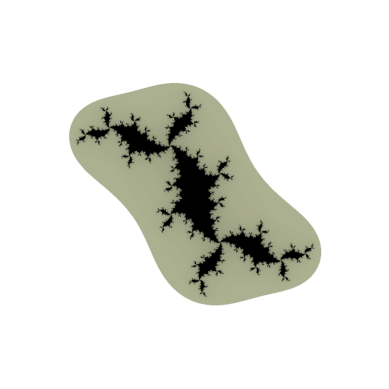

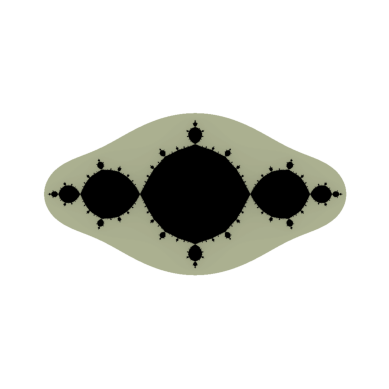

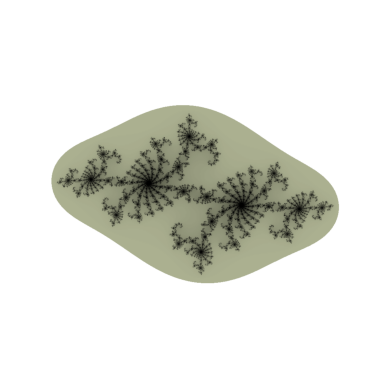

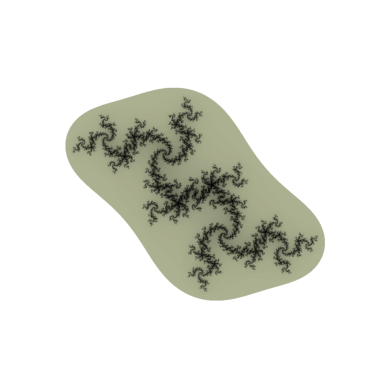

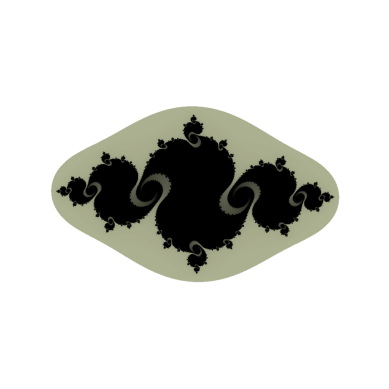

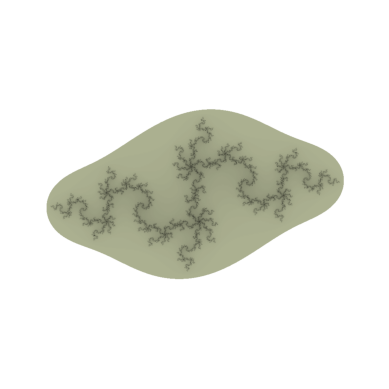

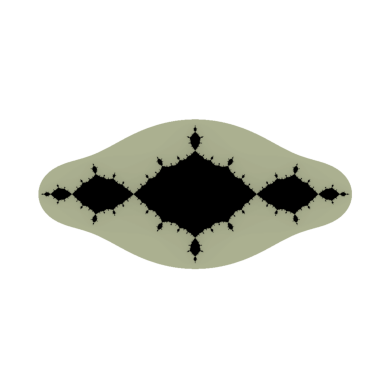

In [43]:
from ctypes.wintypes import SIZE
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

CONVERGENCE_THRESHOLD = 2
MAX_ITERATIONS = 100
X_MIN, X_MAX = -2, 2
Y_MIN, Y_MAX = -2, 2
SIZE = 1000


def remap(x, min_old, max_old, min_new, max_new):
    percentage = (x - min_old) / (max_old - min_old)
    return min_new + percentage * (max_new - min_new)

def pixel_to_complex(x, y):
    r = remap(x, 0, SIZE, X_MIN, X_MAX)
    i = remap(y, 0, SIZE, Y_MIN, Y_MAX)
    return complex(r, i)


def iterations_until_divergence(z, c):
    i = 0
    z_n = z
    while i < MAX_ITERATIONS:
        if abs(z_n) > CONVERGENCE_THRESHOLD:
            return i    
        z_n = z_n**2 + c
        i+=1
    return i


JULIA_CONSTANTS = [
    complex(-0.69, 0.48015), 
    complex(.285, .01), 
    complex(-0.7599999999999978, -0.13984999999999992), 
    complex(0.3900000000000028, -0.08984999999999993),
    complex(.276,.581),
    complex(0.3000000000000005, 0.020149999999999592),
    complex(0.3000000000000005 + 0.020149999999999592),
    complex(0.37000000000000055,0.38014999999999965),
    complex(0.28000000000000047, 0.010149999999999793),
    complex(0.39000000000000057, -0.27984999999999993),
    complex(-0.05999999999999981, -0.6798500000000008),
    complex(-0.06999999999999981, -0.809850000000001),
    complex(-0.22999999999999987 + -0.7198500000000009),
    complex(-0.7400000000000001, -0.23985000000000045),
    complex(-0.22999999999999987, -0.7198500000000009),
    complex(-0.7600000000000001, -0.05985000000000052),
    complex(-0.8700000000000002, 0.2701499999999996),
    complex(-0.5200000000000001 + -0.5898500000000011)]
for c in JULIA_CONSTANTS:
    image = Image.new('RGB', (SIZE, SIZE), (255, 255, 255))
    x_width, y_height = image.size
    for x in range(x_width):
        for y in range(y_height):
            iterations = iterations_until_divergence(pixel_to_complex(x, y), c)
            p_i = remap(iterations, 0, MAX_ITERATIONS, 1, 0)
            color = (int(177 * p_i), int(182 * p_i), int(149 * p_i))
            if (iterations > 2):
                image.putpixel((x, y), color)



    # image.save(f'./output.png')

    plt.imshow(image)
    plt.axis('off')
    plt.show()